# \<Project Proposal: Title\>

## Introduction

... introduction starts here

## Preliminary Results

... preliminary results here

In [2]:
library(tidyverse)
library(tidymodels)
library(janitor)
library(infer)

In [3]:
# data set url
url <- "https://data.ct.gov/api/views/5mzw-sjtu/rows.csv?accessType=DOWNLOAD"

# read data 
real_estate_data <- read_csv(url) |>
    clean_names()

head(real_estate_data)

Rows: 997213 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Date Recorded, Town, Address, Property Type, Residential Type, Non ...
dbl (5): Serial Number, List Year, Assessed Value, Sale Amount, Sales Ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,non_use_code,assessor_remarks,opm_remarks,location
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,NA,NA,NA,NA,NA
20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,NA,NA,NA,NA
200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,NA,NA,NA,NA
200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,NA,NA,NA,NA
200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,NA,NA,NA,NA
200109,2020,12/09/2020,Avon,57 FAR HILLS DRIVE,847520,1250000,0.6780,Residential,Single Family,NA,NA,NA,NA


In [20]:
# keeping only relevant columns
real_estate_selected <- real_estate_data |>
    select(list_year, sales_ratio, property_type) |>
    filter(!is.na(property_type), !is.na(list_year), !is.na(sales_ratio)) |>
    filter(list_year >= 2015) |>
    mutate(property_type = as_factor(property_type))

head(real_estate_selected)

list_year,sales_ratio,property_type
<dbl>,<dbl>,<fct>
2020,0.4630,Commercial
2020,0.5883,Residential
2020,0.7248,Residential
2020,0.6958,Residential
2020,0.5957,Residential
2020,0.6780,Residential


In [21]:
# calculating some summary statistics about the population
min_max_stats <- real_estate_selected |>
    summarize(min_year = min(list_year),
              max_year = max(list_year),
              min_sales_ratio = min(sales_ratio),
              max_sales_ratio = max(sales_ratio))
min_max_stats

mean_stats <- real_estate_selected |>
    summarize(mean_sales_ratio = mean(sales_ratio))
mean_stats

min_year,max_year,min_sales_ratio,max_sales_ratio
<dbl>,<dbl>,<dbl>,<dbl>
2015,2020,0,241910


mean_sales_ratio
<dbl>
2.260832


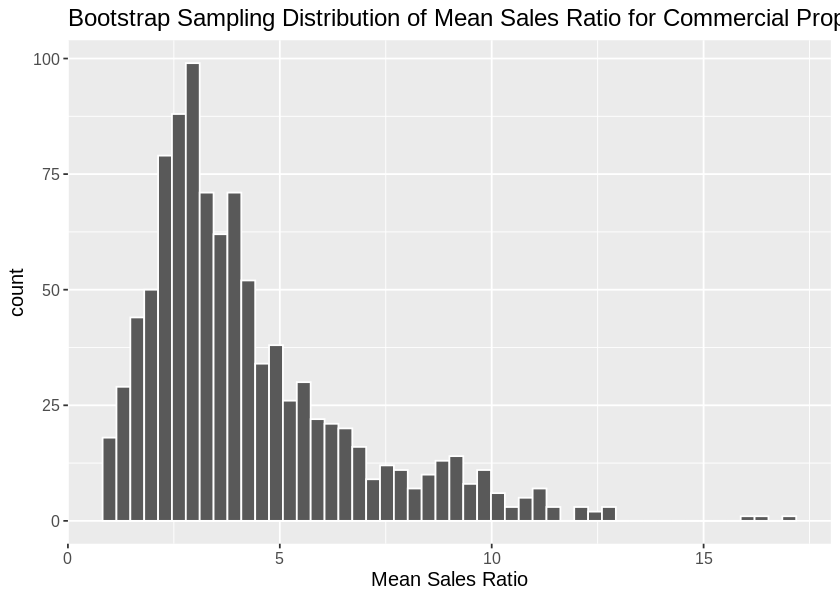

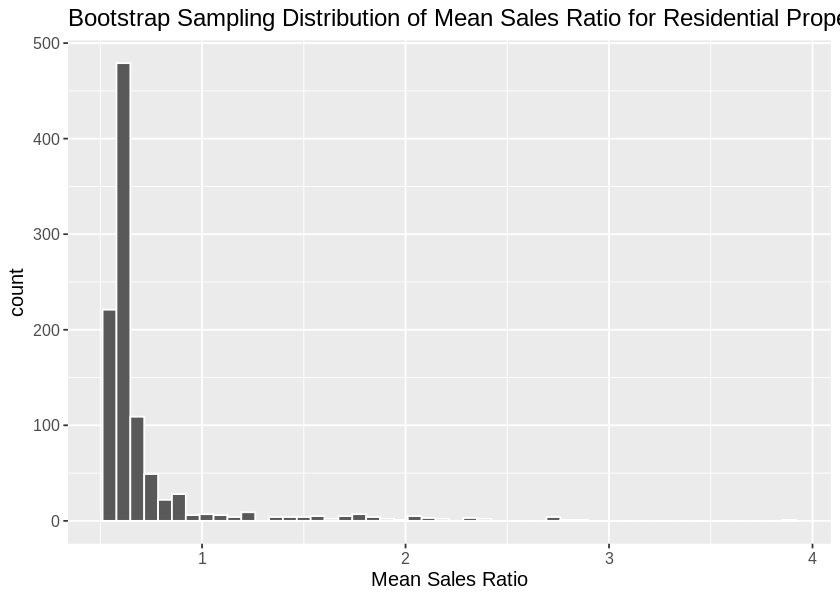

In [33]:
# plotting the distribution of sale ratios?
commercial_ratio_btsp <- real_estate_selected |>
    filter(property_type == "Commercial") |>
    rep_sample_n(reps = 1000, size = 100, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_sales_ratio = mean(sales_ratio))
#head(commercial_ratio_btsp)

residential_ratio_btsp <- real_estate_selected |>
    filter(property_type == "Residential") |>
    rep_sample_n(reps = 1000, size = 100, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_sales_ratio = mean(sales_ratio))
#head(residential_ratio_btsp)

# plotting distributions
options(repr.plot.width = 7, repr.plot.height = 5)

commercial_ratio_dist <- commercial_ratio_btsp |>
    ggplot() +
        geom_histogram(aes(x = mean_sales_ratio), bins = 50, color = "white") +
        ggtitle("Bootstrap Sampling Distribution of Mean Sales Ratio for Commercial Properties") +
        xlab("Mean Sales Ratio") +
        theme(text = element_text(size = 12))
commercial_ratio_dist

residential_ratio_dist <- residential_ratio_btsp |>
    ggplot() +
        geom_histogram(aes(x = mean_sales_ratio), bins = 50, color = "white") +
        ggtitle("Bootstrap Sampling Distribution of Mean Sales Ratio for Residential Properties") +
        xlab("Mean Sales Ratio") +
        theme(text = element_text(size = 12))
residential_ratio_dist

## Methods: Plan

... methods/plan here

## References

- ...
- ...